In [107]:
import matplotlib.pyplot as plt
import os
import csv
import numpy as np
import math
import json

In [210]:
def q5_1(year):
    
    game_types = ['regular_season', 'playoffs']
    shot_types_and_count = {}
    goal_shot_types_and_count = {}
    
    for game_type in game_types:
        csv_path = f'../../../CSV_data/{game_type}/{year}'
        for filename in os.listdir(csv_path):
            with open(csv_path + '/' + filename) as csvfile:
                data = csv.DictReader(csvfile)
                
                for row in data:
                    shot_or_goal = row.get('Shot or Goal')
                    shot_type = row.get('Shot Type')
                    if shot_type != 'NA':
                        if shot_or_goal == "Goal":
                            if shot_type in goal_shot_types_and_count:
                                goal_shot_types_and_count[shot_type] += 1
                            else:
                                goal_shot_types_and_count[shot_type] = 1
                        elif shot_or_goal == "Shot":
                            if shot_type in shot_types_and_count:
                                shot_types_and_count[shot_type] += 1
                            else:
                                shot_types_and_count[shot_type] = 1
 
    # print(list(shot_types_and_count.keys()))
    # print(list(shot_types_and_count.values()))
    
    shot_types_and_count_keys = np.array(list(shot_types_and_count.keys()))
    shot_types_and_count_values = np.array(list(shot_types_and_count.values()))
    
    sorted_order = shot_types_and_count_keys.argsort()
    shot_types_and_count_keys = shot_types_and_count_keys[sorted_order]
    shot_types_and_count_values = shot_types_and_count_values[sorted_order]
    
    print(shot_types_and_count_keys)
    print(shot_types_and_count_values)
    
    # print(list(goal_shot_types_and_count.keys()))
    # print(list(goal_shot_types_and_count.values()))
    
    goal_shot_types_and_count_keys = np.array(list(goal_shot_types_and_count.keys()))
    goal_shot_types_and_count_values = np.array(list(goal_shot_types_and_count.values()))
    
    sorted_order = goal_shot_types_and_count_keys.argsort()
    goal_shot_types_and_count_keys = goal_shot_types_and_count_keys[sorted_order]
    goal_shot_types_and_count_values = goal_shot_types_and_count_values[sorted_order]
    
    # print(goal_shot_types_and_count_keys)
    print(goal_shot_types_and_count_values)    

    plt.figure(figsize=(20, 8))
    
    plt.bar(goal_shot_types_and_count_keys, shot_types_and_count_values)#, color='b')
    plt.bar(goal_shot_types_and_count_keys, goal_shot_types_and_count_values, bottom=shot_types_and_count_values)#, color='r')

    plt.xlabel("Shot Type")
    plt.ylabel("Shot or Goal Count")
    plt.legend(["Shots", "Goals"])
    plt.title(f"Shot or Goal Counts for Various Shot Types in the {int(year)}-{int(year)+1} Season")
    plt.show()

['Backhand' 'Deflected' 'Slap Shot' 'Snap Shot' 'Tip-In' 'Wrap-around'
 'Wrist Shot']
[ 5857   806 12683 11541  3261   773 38041]
[ 698  199  828 1171  712   70 3677]


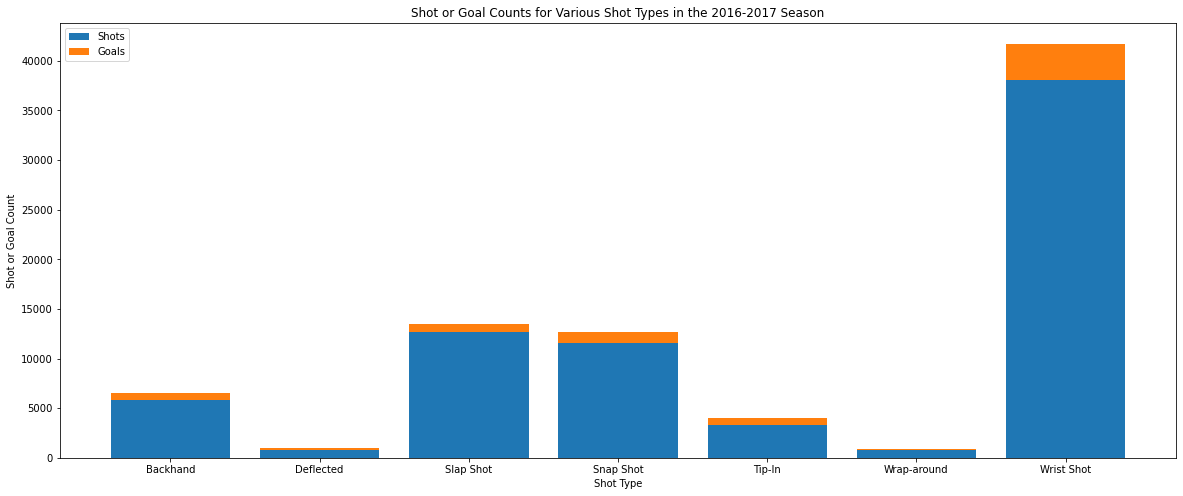

In [213]:
q5_1('2016')
# q5_1('2017')
# q5_1('2018')
# q5_1('2019')
# q5_1('2020')

In [249]:
def q5_2(year):
    
    game_types = ['regular_season', 'playoffs']
    shot_distances = []
    goal_distances = []
    
    for game_type in game_types:
        csv_path = f'../../../CSV_data/{game_type}/{year}'
        for filename in os.listdir(csv_path):
            with open(csv_path + '/' + filename) as csvfile:
                data = csv.DictReader(csvfile)
                
                #open corresponding json file and get start home court side
                # print(f'../../../JSON_data/{game_type}/{year}/{filename[:-4]}.json')
                f = open(f'../../../JSON_data/{game_type}/{year}/{filename[:-4]}.json')
                loaded_json = json.load(f)
                if len(loaded_json['liveData']['linescore']['periods']) > 0:
                    home_side = loaded_json['liveData']['linescore']['periods'][0]['home'].get('rinkSide')
            
                for row in data:
                    y_coor = row.get('Y-Coordinate') 
                    x_coor = row.get('X-Coordinate')

                    y_coor = int(float(y_coor)) if bool(y_coor) and y_coor != 'NA' else False
                    x_coor = int(float(x_coor)) if bool(x_coor) and x_coor != 'NA' else False
                
                    shot_or_goal = row.get('Shot or Goal')
                    # shot_type = row.get('Shot Type')
                    
                    if x_coor and y_coor:
                        if home_side == 'right':                    
                            if row.get('Home or Away') == 'Home':
                                if int(row.get('Period')) % 2 == 1:
                                    # print(row.get('Y-Coordinate'))
                                    # shoot left
                                    distance = math.sqrt((89 + x_coor) ** 2 + (y_coor) ** 2)
                                    # print(distance)
                                    if shot_or_goal == 'Shot':
                                        shot_distances.append(distance)
                                    elif shot_or_goal == 'Goal':
                                        goal_distances.append(distance)

                                elif int(row.get('Period')) % 2 == 0:
                                    # shoot right
                                    distance = math.sqrt((89 - x_coor) ** 2 + (y_coor) ** 2)
                                    if shot_or_goal == 'Shot':
                                        shot_distances.append(distance)
                                    elif shot_or_goal == 'Goal':
                                        goal_distances.append(distance)                                                     
                            else:
                                if int(row.get('Period')) % 2 == 1:
                                    # shoot right
                                    distance = math.sqrt((89 - x_coor) ** 2 + (y_coor) ** 2)
                                    if shot_or_goal == 'Shot':
                                        shot_distances.append(distance)
                                    elif shot_or_goal == 'Goal':
                                        goal_distances.append(distance)

                                elif int(row.get('Period')) % 2 == 0:
                                    # shoot left
                                    distance = math.sqrt((89 + x_coor) ** 2 + (y_coor) ** 2)
                                    if shot_or_goal == 'Shot':
                                        shot_distances.append(distance)
                                    elif shot_or_goal == 'Goal':
                                        goal_distances.append(distance)

                        elif home_side == 'left':
                            if row.get('Home or Away') == 'Home':
                                if int(row.get('Period')) % 2 == 1:
                                    # print(row.get('Y-Coordinate'))
                                    # shoot right
                                    distance = math.sqrt((89 - x_coor) ** 2 + (y_coor) ** 2)
                                    if shot_or_goal == 'Shot':
                                        shot_distances.append(distance)
                                    elif shot_or_goal == 'Goal':
                                        goal_distances.append(distance)

                                elif int(row.get('Period')) % 2 == 0:
                                    # shoot left
                                    distance = math.sqrt((89 + x_coor) ** 2 + (y_coor) ** 2)
                                    if shot_or_goal == 'Shot':
                                        shot_distances.append(distance)
                                    elif shot_or_goal == 'Goal':
                                        goal_distances.append(distance)
                            else:
                                if int(row.get('Period')) % 2 == 1:
                                    # shoot left
                                    distance = math.sqrt((89 + x_coor) ** 2 + (y_coor) ** 2)
                                    if shot_or_goal == 'Shot':
                                        shot_distances.append(distance)
                                    elif shot_or_goal == 'Goal':
                                        goal_distances.append(distance)

                                elif int(row.get('Period')) % 2 == 0:
                                    # shoot right
                                    distance = math.sqrt((89 - x_coor) ** 2 + (y_coor) ** 2)
                                    if shot_or_goal == 'Shot':
                                        shot_distances.append(distance)
                                    elif shot_or_goal == 'Goal':
                                        goal_distances.append(distance)
    
    # print(shot_distances)
    manual_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 
                   105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 
                   190]
    manual_bins_string = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55',
             '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95', '95-100', '100-105', 
             '105-110', '110-115', '115-120', '120-125', '125-130', '130-135', '135-140', '140-145', 
             '145-150', '150-155', '155-160', '160-165', '165-170', '170-175', '175-180', '180-185', '185-190']
    
    (shot_counts, shot_bins, patches) = plt.hist(shot_distances, bins=manual_bins)
    print(shot_counts)
    print(shot_bins)
    (goal_counts, goal_bins, patches) = plt.hist(goal_distances, bins=shot_bins)
    print(goal_counts)
    plt.close()
    
    plt.figure(figsize=(45, 8))
    plt.bar(manual_bins_string, shot_counts)
    plt.bar(manual_bins_string, goal_counts, bottom=shot_counts)
    plt.xlabel("Shot Distance")
    plt.ylabel("Shot or Goal Count")
    plt.legend(["Shots", "Goals"])
    plt.title(f"Shot or Goal Counts based on Shot Distance in the {int(year)}-{int(year)+1} Season")
    plt.show()
    plt.close()

    goal_chance = goal_counts / (goal_counts + shot_counts)
    print(goal_chance)
    
    plt.figure(figsize=(45, 8))
    # plt.bar(manual_bins_string, goal_chance)
    plt.plot(manual_bins_string, goal_chance)
    plt.xlabel("Shot Distance")
    plt.ylabel("Goal Percentage")
    plt.title(f"Goal Percentage based on Shot Distance in the {int(year)}-{int(year)+1} Season")
    plt.show()
                                

[1.610e+02 5.612e+03 7.657e+03 5.367e+03 5.185e+03 5.739e+03 5.994e+03
 6.289e+03 6.013e+03 5.285e+03 5.485e+03 5.647e+03 3.222e+03 1.063e+03
 4.760e+02 3.910e+02 3.020e+02 3.040e+02 1.640e+02 8.200e+01 5.500e+01
 3.900e+01 3.100e+01 2.800e+01 5.900e+01 7.300e+01 5.700e+01 4.100e+01
 6.200e+01 3.100e+01 5.500e+01 4.700e+01 5.300e+01 6.700e+01 6.000e+01
 3.000e+01 1.700e+01 4.000e+00]
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190]
[  77. 1327. 1518.  874.  672.  619.  467.  370.  256.  186.  181.  170.
   82.   32.   18.    8.   14.    9.    9.    9.    7.    2.    9.    5.
    7.    8.    9.    4.    2.    7.    8.    5.   11.   14.    7.    4.
    2.    2.]


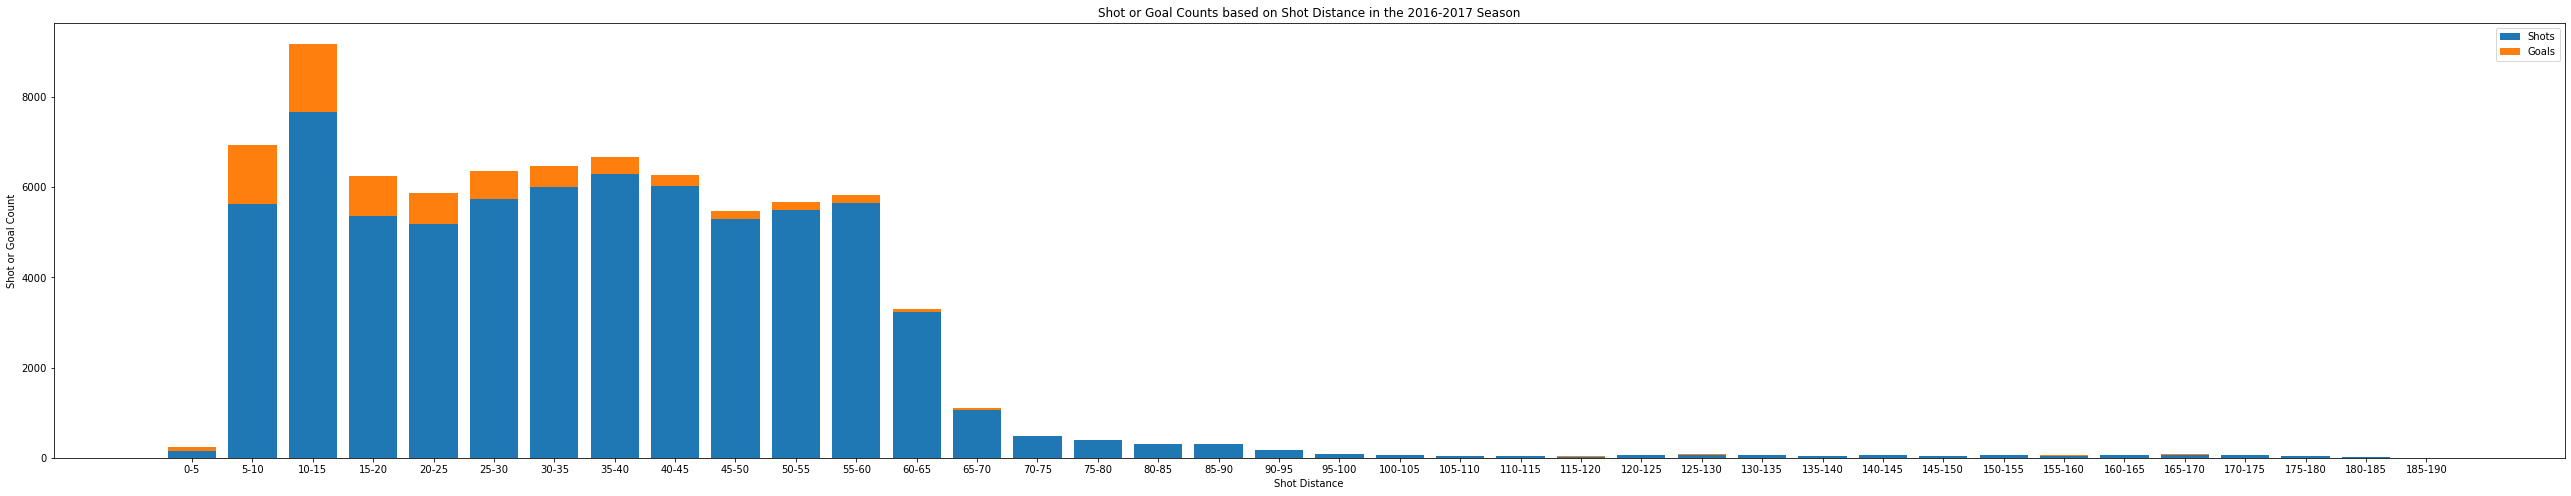

[0.32352941 0.19123793 0.16544959 0.14004166 0.11473451 0.09735766
 0.07227983 0.0555639  0.04083586 0.03399744 0.03194493 0.02922469
 0.0248184  0.02922374 0.03643725 0.02005013 0.0443038  0.02875399
 0.05202312 0.0989011  0.11290323 0.04878049 0.225      0.15151515
 0.10606061 0.09876543 0.13636364 0.08888889 0.03125    0.18421053
 0.12698413 0.09615385 0.171875   0.17283951 0.10447761 0.11764706
 0.10526316 0.33333333]


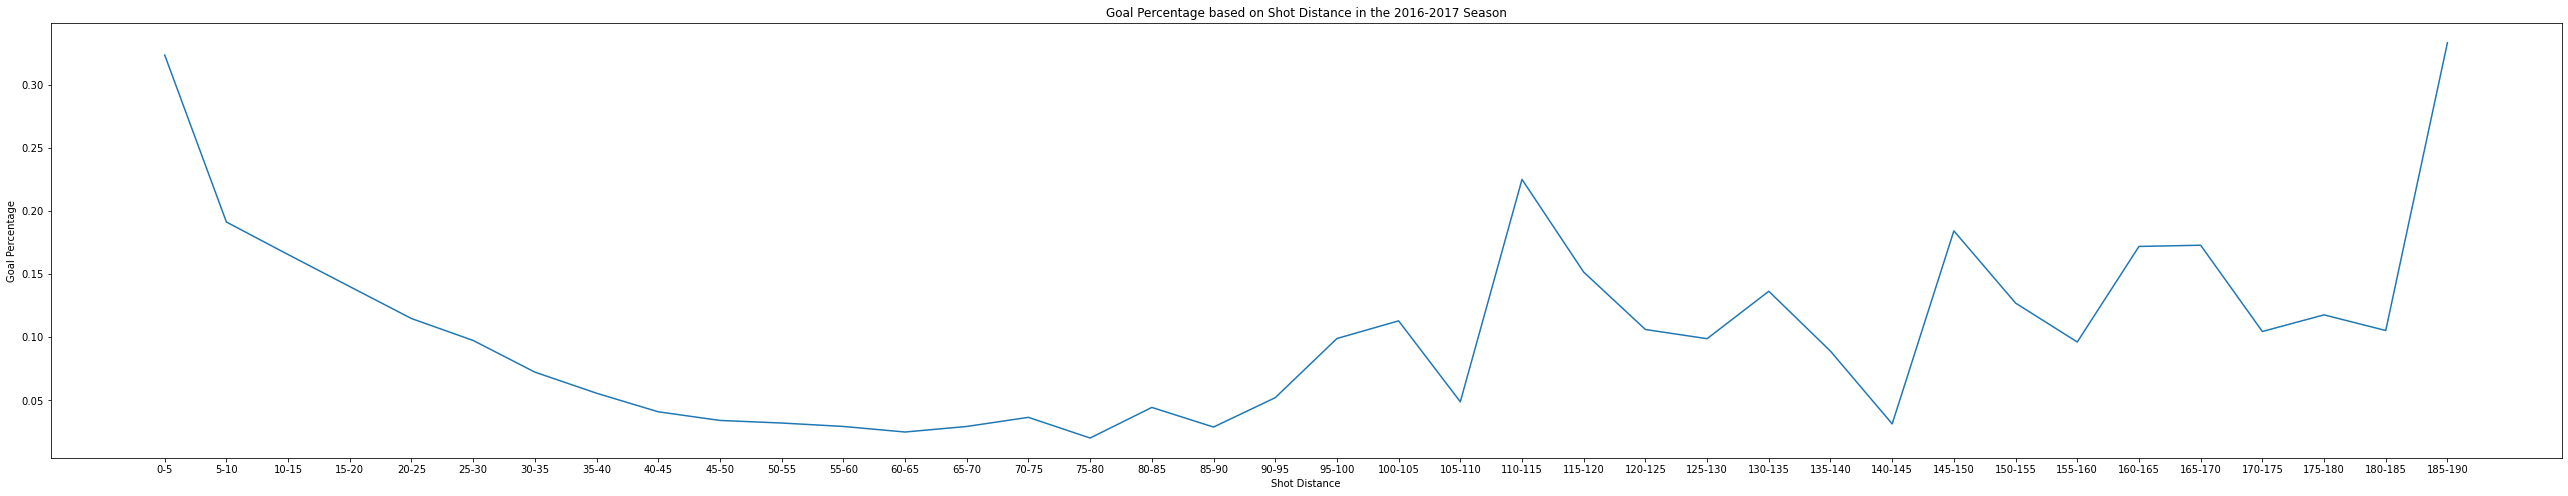

In [250]:
q5_2('2016')
# q5_2('2017')
# q5_2('2018')
# q5_2('2019')
# q5_2('2020')

In [245]:
def q5_3(year):
    game_types = ['regular_season', 'playoffs']
    shot_categories = {}
    goal_shot_categories = {}
    # shot_distances = []
    # goal_distances = []
    
    for game_type in game_types:
        csv_path = f'../../../CSV_data/{game_type}/{year}'
        for filename in os.listdir(csv_path):
            with open(csv_path + '/' + filename) as csvfile:
                data = csv.DictReader(csvfile)
                
                #open corresponding json file and get start home court side
                # print(f'../../../JSON_data/{game_type}/{year}/{filename[:-4]}.json')
                f = open(f'../../../JSON_data/{game_type}/{year}/{filename[:-4]}.json')
                loaded_json = json.load(f)
                if len(loaded_json['liveData']['linescore']['periods']) > 0:
                    home_side = loaded_json['liveData']['linescore']['periods'][0]['home'].get('rinkSide')
            
                for row in data:
                    y_coor = row.get('Y-Coordinate') 
                    x_coor = row.get('X-Coordinate')

                    y_coor = int(float(y_coor)) if bool(y_coor) and y_coor != 'NA' else False
                    x_coor = int(float(x_coor)) if bool(x_coor) and x_coor != 'NA' else False
                
                    shot_or_goal = row.get('Shot or Goal')
                    shot_type = row.get('Shot Type')
                    
                    if shot_type != 'NA':
                        if x_coor and y_coor:
                            if home_side == 'right':                    
                                if row.get('Home or Away') == 'Home':
                                    if int(row.get('Period')) % 2 == 1:
                                        # print(row.get('Y-Coordinate'))
                                        # shoot left
                                        distance = math.sqrt((89 + x_coor) ** 2 + (y_coor) ** 2)
                                        # print(distance)
                                        if shot_or_goal == 'Shot':
                                            if shot_type in shot_categories:
                                                shot_categories[shot_type].append(distance)
                                            else:
                                                shot_categories[shot_type] = [distance]
                                        elif shot_or_goal == 'Goal':
                                            if shot_type in goal_shot_categories:
                                                goal_shot_categories[shot_type].append(distance)
                                            else:
                                                goal_shot_categories[shot_type] = [distance]

                                    elif int(row.get('Period')) % 2 == 0:
                                        # shoot right
                                        distance = math.sqrt((89 - x_coor) ** 2 + (y_coor) ** 2)
                                        if shot_or_goal == 'Shot':
                                            if shot_type in shot_categories:
                                                shot_categories[shot_type].append(distance)
                                            else:
                                                shot_categories[shot_type] = [distance]
                                        elif shot_or_goal == 'Goal':
                                            if shot_type in goal_shot_categories:
                                                goal_shot_categories[shot_type].append(distance)
                                            else:
                                                goal_shot_categories[shot_type] = [distance]                                                    
                                else:
                                    if int(row.get('Period')) % 2 == 1:
                                        # shoot right
                                        distance = math.sqrt((89 - x_coor) ** 2 + (y_coor) ** 2)
                                        if shot_or_goal == 'Shot':
                                            if shot_type in shot_categories:
                                                shot_categories[shot_type].append(distance)
                                            else:
                                                shot_categories[shot_type] = [distance]
                                        elif shot_or_goal == 'Goal':
                                            if shot_type in goal_shot_categories:
                                                goal_shot_categories[shot_type].append(distance)
                                            else:
                                                goal_shot_categories[shot_type] = [distance]

                                    elif int(row.get('Period')) % 2 == 0:
                                        # shoot left
                                        distance = math.sqrt((89 + x_coor) ** 2 + (y_coor) ** 2)
                                        if shot_or_goal == 'Shot':
                                            if shot_type in shot_categories:
                                                shot_categories[shot_type].append(distance)
                                            else:
                                                shot_categories[shot_type] = [distance]
                                        elif shot_or_goal == 'Goal':
                                            if shot_type in goal_shot_categories:
                                                goal_shot_categories[shot_type].append(distance)
                                            else:
                                                goal_shot_categories[shot_type] = [distance]

                            elif home_side == 'left':
                                if row.get('Home or Away') == 'Home':
                                    if int(row.get('Period')) % 2 == 1:
                                        # print(row.get('Y-Coordinate'))
                                        # shoot right
                                        distance = math.sqrt((89 - x_coor) ** 2 + (y_coor) ** 2)
                                        if shot_or_goal == 'Shot':
                                            if shot_type in shot_categories:
                                                shot_categories[shot_type].append(distance)
                                            else:
                                                shot_categories[shot_type] = [distance]
                                        elif shot_or_goal == 'Goal':
                                            if shot_type in goal_shot_categories:
                                                goal_shot_categories[shot_type].append(distance)
                                            else:
                                                goal_shot_categories[shot_type] = [distance]

                                    elif int(row.get('Period')) % 2 == 0:
                                        # shoot left
                                        distance = math.sqrt((89 + x_coor) ** 2 + (y_coor) ** 2)
                                        if shot_or_goal == 'Shot':
                                            if shot_type in shot_categories:
                                                shot_categories[shot_type].append(distance)
                                            else:
                                                shot_categories[shot_type] = [distance]
                                        elif shot_or_goal == 'Goal':
                                            if shot_type in goal_shot_categories:
                                                goal_shot_categories[shot_type].append(distance)
                                            else:
                                                goal_shot_categories[shot_type] = [distance]
                                else:
                                    if int(row.get('Period')) % 2 == 1:
                                        # shoot left
                                        distance = math.sqrt((89 + x_coor) ** 2 + (y_coor) ** 2)
                                        if shot_or_goal == 'Shot':
                                            if shot_type in shot_categories:
                                                shot_categories[shot_type].append(distance)
                                            else:
                                                shot_categories[shot_type] = [distance]
                                        elif shot_or_goal == 'Goal':
                                            if shot_type in goal_shot_categories:
                                                goal_shot_categories[shot_type].append(distance)
                                            else:
                                                goal_shot_categories[shot_type] = [distance]

                                    elif int(row.get('Period')) % 2 == 0:
                                        # shoot right
                                        distance = math.sqrt((89 - x_coor) ** 2 + (y_coor) ** 2)
                                        if shot_or_goal == 'Shot':
                                            if shot_type in shot_categories:
                                                shot_categories[shot_type].append(distance)
                                            else:
                                                shot_categories[shot_type] = [distance]
                                        elif shot_or_goal == 'Goal':
                                            if shot_type in goal_shot_categories:
                                                goal_shot_categories[shot_type].append(distance)
                                            else:
                                                goal_shot_categories[shot_type] = [distance]
    
    
    # print(shot_categories)
    # print(goal_shot_categories)

    manual_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]
    manual_bins_string = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', 
                          '100-110', '110-120', '120-130', '130-140', '140-150', '150-160', '160-170', '170-180', 
                          '180-190']
    
    shot_categories_chances = {}
    for shot_type in shot_categories:
        print(shot_type)
        (shot_counts, shot_bins, patches) = plt.hist(shot_categories[shot_type], bins=manual_bins)
        (goal_counts, goal_bins, patches) = plt.hist(goal_shot_categories[shot_type], bins=shot_bins)
        print(type(goal_counts / (goal_counts + shot_counts)))
        shot_categories_chances[shot_type] = goal_counts / (goal_counts + shot_counts)
        # shot_categories_chances[shot_type][np.isnan(shot_categories_chances[shot_type])] = 0
    plt.close()
    
    # print(shot_distances)
    plt.figure(figsize=(45, 8))
    for shot_type in shot_categories_chances:
        plt.plot(manual_bins_string, shot_categories_chances[shot_type], label=shot_type)
    
    plt.xlabel("Shot Distance")
    plt.ylabel("Goal Percentage")
    plt.legend()
    plt.title(f"Goal Percentages for Various Shot Types in the {int(year)}-{int(year)+1} Season")
    plt.show()

Backhand
<class 'numpy.ndarray'>
Slap Shot
<class 'numpy.ndarray'>
Wrist Shot


/var/folders/r1/g6g5ylnd3l5fdc1tyq1k0v4c0000gn/T/ipykernel_96856/639701602.py:166: RuntimeWarning: invalid value encountered in true_divide
  print(type(goal_counts / (goal_counts + shot_counts)))
/var/folders/r1/g6g5ylnd3l5fdc1tyq1k0v4c0000gn/T/ipykernel_96856/639701602.py:167: RuntimeWarning: invalid value encountered in true_divide
  shot_categories_chances[shot_type] = goal_counts / (goal_counts + shot_counts)


<class 'numpy.ndarray'>
Snap Shot
<class 'numpy.ndarray'>
Wrap-around
<class 'numpy.ndarray'>
Tip-In
<class 'numpy.ndarray'>
Deflected
<class 'numpy.ndarray'>


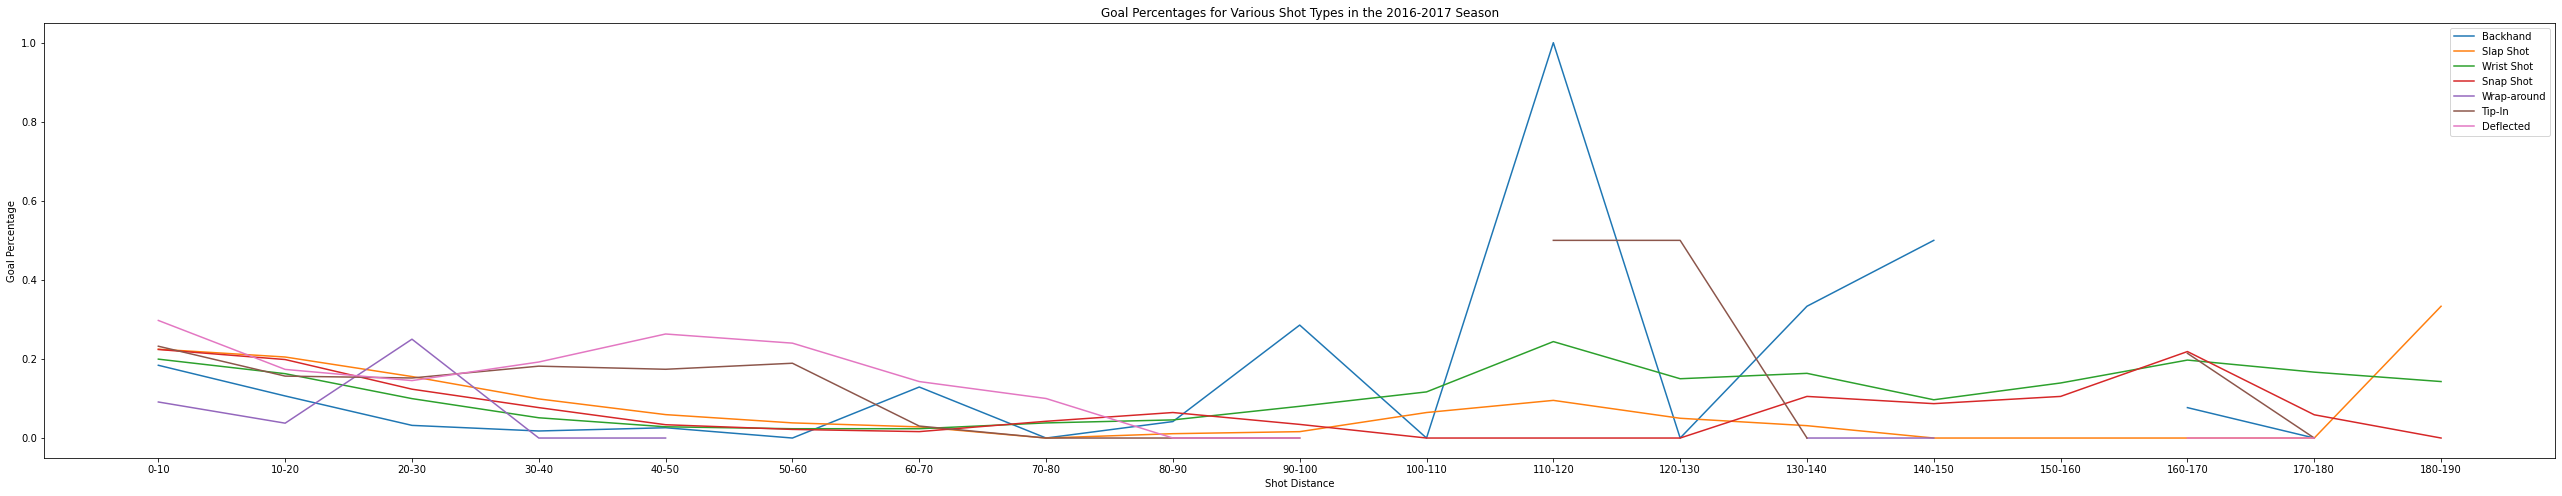

In [246]:
q5_3('2016')